# EPFL MAP - YEAR 2016

In [72]:
import json
import pickle
import collections
from collections import defaultdict
from BuildGraphModule import *
from UniformData import *
from MultiGraph import *
from AnalysisModule import *
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
with open('paper.json', 'r') as f:
    data = json.load(f)

In [74]:
# Uniform strings - Authors
data = uniform_authors(data)

In [75]:
# Uniform strings - EPFL Authors
data = uniform_epfl_authors(data)

In [129]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) == 2014:
            data_cut[paper] = data[paper]
    except:
        continue

In [130]:
dict_lab_site, dict_labs, dict_labs_paper = lab_dictionaries(data_cut)

In [131]:
# Dictionary (lab, id)
dict_lab_id = {}
for  id_,lab in enumerate(list(dict_labs_paper.keys())):
    dict_lab_id[lab] = id_
    
dict_id_lab = {v: k for k, v in dict_lab_id.items()}

In [132]:
# Nodes: labs
nodes = []
for lab in list(dict_labs_paper.keys()):
    nodes += [dict_lab_id[lab]]

In [133]:
# Define edges of the graph: labs that writes papers together
# Dictionary (Lab, dict(lab, publication together))
dict_edges = {}
for lab in list(dict_labs_paper.keys()):
    dict_edges[lab] = defaultdict(list) 
    for lab_2 in list(dict_labs_paper.keys()):
        if lab_2 != lab:
            list_intersection = [p for p in dict_labs_paper[lab] if p in dict_labs_paper[lab_2]]
            if len(list_intersection) != 0:
                dict_edges[lab][lab_2] += list_intersection
            #dict_edges[lab_2][lab] += [p for p in dict_labs_paper[lab] if p in dict_labs_paper[lab_2]]

In [134]:
dict_edges

{' IPESE (sci-sti-fm)': defaultdict(list,
             {'Transportation and Mobility Laboratory': ['201852']}),
 ' Prof. Tang Group': defaultdict(list, {}),
 ' Programmable Biomaterials Laboratory': defaultdict(list, {}),
 'Adaptive Micronano Wave Systems': defaultdict(list,
             {'Electromagnetics and Acoustics Laboratory': ['198235',
               '210401',
               '210458',
               '210459',
               '198238',
               '210470',
               '210457',
               '210456'],
              'Microsystems for Space Technologies Laboratory': ['210401'],
              'Nanoelectronic Devices Laboratory': ['210458',
               '210459',
               '198231',
               '210457',
               '210456'],
              'Telecommunications Circuits Laboratory': ['198234']}),
 'Advanced Oxidation Processes Group': defaultdict(list, {}),
 'Applied Computing and Mechanics Laboratory': defaultdict(list,
             {'Laboratory of Techniques an

In [135]:
list_schools = ['ENAC', 'SB', 'IC', 'STI', 'SV']

In [136]:
school_lab_dict = {}
for school in list_schools:
    school_lab_dict.update(school_lab(dict_lab_site, school))

In [137]:
len(school_lab_dict)

191

In [138]:
# Get the list of edges and weigths for the edges
edges = []
weigths = {}
for lab in dict_edges:
    if len(dict_edges[lab]) != 0:
        for lab_2 in dict_edges[lab]:
            edges += sorted([(dict_lab_id[lab], dict_lab_id[lab_2])])
            weigths[(dict_lab_id[lab], dict_lab_id[lab_2])] = len(dict_edges[lab][lab_2])

In [226]:
dict_school_pub_edges = defaultdict(int)
for edge in list(weigths.keys()):
    try:
        dict_school_pub_edges[school_lab_dict[dict_id_lab[edge[0]]], school_lab_dict[dict_id_lab[edge[1]]]] += weigths[edge]
    except:
        continue

# Whe has more labs

In [140]:
import collections
counter=collections.Counter(list(school_lab_dict.values()))

In [141]:
counter

Counter({'ENAC': 51, 'IC': 31, 'SB': 44, 'STI': 52, 'SV': 13})

In [229]:
for key in list(dict_school_pub_edges.keys()):
    if key[0] == key[1]:
        del dict_school_pub_edges[key]

In [231]:
total_paper = sum(list(dict_school_pub_edges.values()))

In [254]:
dict_inter_school_pub = defaultdict(int)
for key in list(dict_school_pub_edges.keys()):
    pair_school = tuple(sorted([key[0], key[1]]))
    dict_inter_school_pub[pair_school] += dict_school_pub_edges[key]/total_paper

In [255]:
# 2014
dict_inter_school_pub

defaultdict(int,
            {('ENAC', 'IC'): 0.19298245614035087,
             ('ENAC', 'SB'): 0.10526315789473684,
             ('ENAC', 'STI'): 0.24561403508771928,
             ('ENAC', 'SV'): 0.03508771929824561,
             ('IC', 'SB'): 0.03508771929824561,
             ('IC', 'STI'): 0.03508771929824561,
             ('IC', 'SV'): 0.03508771929824561,
             ('SB', 'STI'): 0.21052631578947367,
             ('SB', 'SV'): 0.03508771929824561,
             ('STI', 'SV'): 0.07017543859649122})

In [256]:
# 2015
dict_inter_school_pub

defaultdict(int,
            {('ENAC', 'IC'): 0.19298245614035087,
             ('ENAC', 'SB'): 0.10526315789473684,
             ('ENAC', 'STI'): 0.24561403508771928,
             ('ENAC', 'SV'): 0.03508771929824561,
             ('IC', 'SB'): 0.03508771929824561,
             ('IC', 'STI'): 0.03508771929824561,
             ('IC', 'SV'): 0.03508771929824561,
             ('SB', 'STI'): 0.21052631578947367,
             ('SB', 'SV'): 0.03508771929824561,
             ('STI', 'SV'): 0.07017543859649122})

In [11]:
# Which are the schools which collaborated most in 2016?

# Create map

In [314]:
import numpy as np

In [315]:
X_1 = 532700
X_2 = 533507
Y_1 = 152693
Y_2 = 152242

In [316]:
X_1_scaled = 0
X_2_scaled = 807
Y_1_scaled = 451
Y_2_scaled = 0

In [501]:
# Scaled coordinates
coordinate_ENAC = (533078- X_1,152571-Y_2)
coordinate_IC = (532818- X_1, 152292-Y_2)
coordinate_SV = (532815- X_1,152457-Y_2)
coordinate_SB = (533263- X_1,152526-Y_2)
coordinate_STI = (532938- X_1, 152399-Y_2)

In [565]:
# Scaled coordinates
coordinate_ENAC = (152571-Y_2, 533078- X_1)
coordinate_IC = (152292-Y_2, 532818- X_1, )
coordinate_SV = (152457-Y_2, 532815- X_1)
coordinate_SB = (152526-Y_2, 533263- X_1)
coordinate_STI = (152399-Y_2, 532938- X_1)

In [566]:
dict_school = {list_schools[i]:i+1 for i in range(len(list_schools))}

In [567]:
# Create the grid 113 x 202 each patch is 4x4
#empty_map = np.zeros((113,202))
empty_map = np.zeros((451,807))

In [568]:
ranges_X = np.arange(X_1_scaled, X_2_scaled, 1)
ranges_Y = np.arange(Y_2_scaled, Y_1_scaled, 1)

In [569]:
school_center_map = {'ENAC': coordinate_ENAC, 'IC':coordinate_IC, 'SV':coordinate_SV, 'SB':coordinate_SB, 'STI':coordinate_STI}

In [570]:
dict_coordinates = {'ENAC': coordinate_ENAC, 'IC':coordinate_IC, 'SV':coordinate_SV, 'SB':coordinate_SB, 'STI':coordinate_STI}

In [571]:
#school_center_map = {}
#for school in list_schools:
#    list_ranges_x = [i for i in ranges_X if i >= dict_coordinates[school][0]-4]
#    x_1 = list(ranges_X).index(list_ranges_x[0])
    
#    list_ranges_y = [i for i in ranges_Y if i >= dict_coordinates[school][1]-4]
#    y_1 = list(ranges_Y).index(list_ranges_y[0])
    
#    school_center_map[school] = (x_1, y_1)

In [572]:
dict_coordinates


{'ENAC': (329, 378),
 'IC': (50, 118),
 'SB': (284, 563),
 'STI': (157, 238),
 'SV': (215, 115)}

In [573]:
school_center_map

{'ENAC': (329, 378),
 'IC': (50, 118),
 'SB': (284, 563),
 'STI': (157, 238),
 'SV': (215, 115)}

In [574]:
# Define distances between points
import math
dict_distances = defaultdict(int)
for school in list(dict_coordinates.keys()):
    for school_1 in list(dict_coordinates.keys()):
        if school != school_1:
            dict_distances[(school, school_1)] = math.sqrt( (school_center_map[school][0] - school_center_map[school_1][0])**2 + (school_center_map[school][1] - school_center_map[school_1][1])**2 )

In [575]:
dict_distances

defaultdict(int,
            {('ENAC', 'IC'): 381.36727704405894,
             ('ENAC', 'SB'): 190.3943276465977,
             ('ENAC', 'STI'): 221.7746604100658,
             ('ENAC', 'SV'): 286.6443789785524,
             ('IC', 'ENAC'): 381.36727704405894,
             ('IC', 'SB'): 502.7733087585299,
             ('IC', 'STI'): 160.77624202599088,
             ('IC', 'SV'): 165.0272704737008,
             ('SB', 'ENAC'): 190.3943276465977,
             ('SB', 'IC'): 502.7733087585299,
             ('SB', 'STI'): 348.9326582594412,
             ('SB', 'SV'): 453.28247263709636,
             ('STI', 'ENAC'): 221.7746604100658,
             ('STI', 'IC'): 160.77624202599088,
             ('STI', 'SB'): 348.9326582594412,
             ('STI', 'SV'): 135.988970140964,
             ('SV', 'ENAC'): 286.6443789785524,
             ('SV', 'IC'): 165.0272704737008,
             ('SV', 'SB'): 453.28247263709636,
             ('SV', 'STI'): 135.988970140964})

In [576]:
dict_distance_inter_school = defaultdict(int)
for key in list(dict_distances.keys()):
    pair_school = tuple(sorted([key[0], key[1]]))
    dict_distance_inter_school[pair_school] += dict_distances[key]

In [577]:
dict_distance_inter_school

defaultdict(int,
            {('ENAC', 'IC'): 762.7345540881179,
             ('ENAC', 'SB'): 380.7886552931954,
             ('ENAC', 'STI'): 443.5493208201316,
             ('ENAC', 'SV'): 573.2887579571048,
             ('IC', 'SB'): 1005.5466175170598,
             ('IC', 'STI'): 321.55248405198176,
             ('IC', 'SV'): 330.0545409474016,
             ('SB', 'STI'): 697.8653165188824,
             ('SB', 'SV'): 906.5649452741927,
             ('STI', 'SV'): 271.977940281928})

#### Define the score function
   $$QP_u = \frac{\sum_{v}[ (1-\theta_{uv}) \times||(u,v)||^2_2]}{\sum_{\text{all pairs }(u,v)}[ (1-\theta_{uv}) \times||(u,v)||^2_2]}$$
   
where:

* $QP_u$: quality position of the school $u$
* $\theta_{uv}$: is the proportion of work produced by both u and v over the number of all publication between two schools

Thus, the index varies between 0 and 1. Greater it is better is positioned the school according to its research contribution.

In [578]:
dict_inter_school_pub

defaultdict(int,
            {('ENAC', 'IC'): 0.19298245614035087,
             ('ENAC', 'SB'): 0.10526315789473684,
             ('ENAC', 'STI'): 0.24561403508771928,
             ('ENAC', 'SV'): 0.03508771929824561,
             ('IC', 'ENAC'): 0,
             ('IC', 'SB'): 0.03508771929824561,
             ('IC', 'STI'): 0.03508771929824561,
             ('IC', 'SV'): 0.03508771929824561,
             ('SB', 'ENAC'): 0,
             ('SB', 'IC'): 0,
             ('SB', 'STI'): 0.21052631578947367,
             ('SB', 'SV'): 0.03508771929824561,
             ('STI', 'ENAC'): 0,
             ('STI', 'IC'): 0,
             ('STI', 'SB'): 0,
             ('STI', 'SV'): 0.07017543859649122,
             ('SV', 'ENAC'): 0,
             ('SV', 'IC'): 0,
             ('SV', 'SB'): 0,
             ('SV', 'STI'): 0})

In [579]:
# 2014
dict_theta = {}
for pairs in list(dict_distances.keys()):
    dict_theta[(pairs[0],pairs[1])] = dict_inter_school_pub[pairs]
    dict_theta[(pairs[1],pairs[0])] = dict_inter_school_pub[pairs]
    #if pairs in list(dict_school_pub_edges.keys()):
     #   dict_theta[pairs] = dict_inter_school_pub[pairs]
    #else:
     #   dict_theta[pairs] = 0

In [580]:
dict_index = {}
list_index = []
for pairs in list(dict_distances.keys()):
    list_index += [dict_distances[pairs] * (1-dict_theta[pairs])]
    dict_index[pairs] = dict_distances[pairs] * (1-dict_theta[pairs])

In [581]:
denominator = sum(list_index)

In [582]:
dict_theta

{('ENAC', 'IC'): 0.19298245614035087,
 ('ENAC', 'SB'): 0.10526315789473684,
 ('ENAC', 'STI'): 0.24561403508771928,
 ('ENAC', 'SV'): 0,
 ('IC', 'ENAC'): 0.19298245614035087,
 ('IC', 'SB'): 0,
 ('IC', 'STI'): 0.03508771929824561,
 ('IC', 'SV'): 0,
 ('SB', 'ENAC'): 0.10526315789473684,
 ('SB', 'IC'): 0,
 ('SB', 'STI'): 0,
 ('SB', 'SV'): 0,
 ('STI', 'ENAC'): 0.24561403508771928,
 ('STI', 'IC'): 0.03508771929824561,
 ('STI', 'SB'): 0,
 ('STI', 'SV'): 0.07017543859649122,
 ('SV', 'ENAC'): 0,
 ('SV', 'IC'): 0,
 ('SV', 'SB'): 0,
 ('SV', 'STI'): 0.07017543859649122}

In [583]:
dict_index

{('ENAC', 'IC'): 307.7700832285388,
 ('ENAC', 'SB'): 170.35281947327164,
 ('ENAC', 'STI'): 167.30369118654087,
 ('ENAC', 'SV'): 286.6443789785524,
 ('IC', 'ENAC'): 307.7700832285388,
 ('IC', 'SB'): 502.7733087585299,
 ('IC', 'STI'): 155.1349703759561,
 ('IC', 'SV'): 165.0272704737008,
 ('SB', 'ENAC'): 170.35281947327164,
 ('SB', 'IC'): 502.7733087585299,
 ('SB', 'STI'): 348.9326582594412,
 ('SB', 'SV'): 453.28247263709636,
 ('STI', 'ENAC'): 167.30369118654087,
 ('STI', 'IC'): 155.1349703759561,
 ('STI', 'SB'): 348.9326582594412,
 ('STI', 'SV'): 126.4458845170367,
 ('SV', 'ENAC'): 286.6443789785524,
 ('SV', 'IC'): 165.0272704737008,
 ('SV', 'SB'): 453.28247263709636,
 ('SV', 'STI'): 126.4458845170367}

In [584]:
qp_dictionary = {}
for school in list_schools:
    list_school_score = [dict_index[key] for key in list(dict_distances.keys()) if key[0] == school]
    qp_dictionary[school] = sum(list_school_score)/4#/denominator

In [585]:
qp_dictionary

{'ENAC': 233.01774321672593,
 'IC': 282.67640820918143,
 'SB': 368.83531478208477,
 'STI': 199.45430108474372,
 'SV': 257.8500016515966}

In [586]:
dict_theta

{('ENAC', 'IC'): 0.19298245614035087,
 ('ENAC', 'SB'): 0.10526315789473684,
 ('ENAC', 'STI'): 0.24561403508771928,
 ('ENAC', 'SV'): 0,
 ('IC', 'ENAC'): 0.19298245614035087,
 ('IC', 'SB'): 0,
 ('IC', 'STI'): 0.03508771929824561,
 ('IC', 'SV'): 0,
 ('SB', 'ENAC'): 0.10526315789473684,
 ('SB', 'IC'): 0,
 ('SB', 'STI'): 0,
 ('SB', 'SV'): 0,
 ('STI', 'ENAC'): 0.24561403508771928,
 ('STI', 'IC'): 0.03508771929824561,
 ('STI', 'SB'): 0,
 ('STI', 'SV'): 0.07017543859649122,
 ('SV', 'ENAC'): 0,
 ('SV', 'IC'): 0,
 ('SV', 'SB'): 0,
 ('SV', 'STI'): 0.07017543859649122}

In [587]:
def gauss(x,p):
    """Return the gauss function N(x), with mean p[0] and std p[1].
    Normalized such that N(x=p[0]) = 1.
    """
    return np.exp((-(x - p[0])**2) / (2 * p[1]**2))



In [588]:
school_center_map

{'ENAC': (329, 378),
 'IC': (50, 118),
 'SB': (284, 563),
 'STI': (157, 238),
 'SV': (215, 115)}

In [589]:
qp_dictionary

{'ENAC': 233.01774321672593,
 'IC': 282.67640820918143,
 'SB': 368.83531478208477,
 'STI': 199.45430108474372,
 'SV': 257.8500016515966}

In [608]:
# Create the grid 113 x 202 each patch is 4x4
epfl_map =np.zeros((451,807))
#x,y center position
size_x, size_y = 451,807
#score ; score of the center
sigma_school = dict_coordinates = {'ENAC': 60, 'IC':40, 'SV':40, 'SB':50, 'STI': 40}
#Modify map according to the center score
for school in list(school_center_map.keys()):
    for i in range(size_x):
        for j in range(size_y):
            #calculate gaussian distr sigma is space factor
            disc = gauss(np.sqrt(((size_x - school_center_map[school][0])-i)**2+((school_center_map[school][1])-j)**2),[0, sigma_school[school]])
            epfl_map[i][j] += disc*qp_dictionary[school]

In [609]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

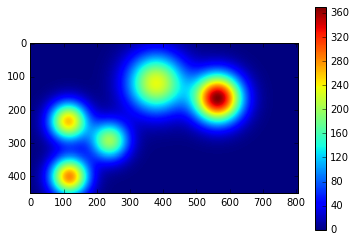

In [610]:
plt.imshow(epfl_map, interpolation='nearest')
plt.colorbar()
plt.show()

# Create the graph

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
G=nx.Graph()

In [14]:
G.add_nodes_from(nodes)

In [15]:
G.add_edges_from(edges)

In [16]:
# Add weights
for i,j in edges:
    G[i][j]['weight'] = weigths[(i,j)]

In [17]:
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 152
Average degree:   1.4545


In [18]:
spring_pos = nx.spring_layout(G)

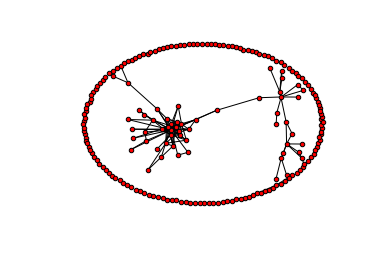

In [19]:
plt.axis('off')
nx.draw_networkx(G, pos = spring_pos, with_labels=False, node_size=20)

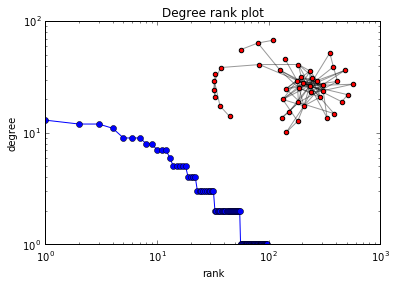

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

In [104]:
betweeness_sequence=nx.degree_centrality(G)

In [105]:
import operator
sorted_x = sorted(betweeness_sequence.items(), key=operator.itemgetter(1), reverse = True)

In [106]:
sorted_x[:20]

[(47, 0.13461538461538464),
 (120, 0.0625),
 (22, 0.057692307692307696),
 (71, 0.057692307692307696),
 (193, 0.05288461538461539),
 (86, 0.04326923076923077),
 (140, 0.04326923076923077),
 (166, 0.04326923076923077),
 (90, 0.038461538461538464),
 (94, 0.038461538461538464),
 (113, 0.03365384615384616),
 (144, 0.03365384615384616),
 (146, 0.03365384615384616),
 (50, 0.028846153846153848),
 (43, 0.02403846153846154),
 (54, 0.02403846153846154),
 (98, 0.02403846153846154),
 (165, 0.02403846153846154),
 (177, 0.02403846153846154),
 (2, 0.019230769230769232)]

In [107]:
dict_id_lab = {v: k for k, v in dict_lab_id.items()}

In [109]:
dict_id_lab[22]

'Laboratory of Theory and History of Architecture 3'

In [ ]:
# Number of papers two labs pubilsh together